In [ ]:
!pip3 install lifelines

# <div style="text-align: left; background-color:seagreen ; font-family: Papyrus, sans-serif; font-size: 25px; font-weight: bold; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> About Dataset </div> 

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

***The data set includes information about:***

 - Customers who left within the last month – the column is called Churn
 - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 - Demographic info about customers – gender, age range, and if they have partners and dependents

**Inspiration**

To explore this type of models and learn more about the subject.

***New version from IBM:***
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

# <div style="text-align: left; background-color:seagreen ; font-family: Papyrus, sans-serif; font-size: 25px; font-weight: bold; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Importing Required Libraries </div> 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
import matplotlib.ticker as ticker
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import lifelines
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

from lifelines.calibration import survival_probability_calibration

# <div style="text-align: left; background-color:seagreen ; font-family: Papyrus, sans-serif; font-size: 25px; font-weight: bold; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Preparing Prediction Data </div> 

In [3]:
# Loading the CSV with pandas
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Train/test splitting

In [4]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=100, stratify=data['Churn'].values)

print('length of train_df and test_df: ', len(train_df), len(test_df))

length of train_df and test_df:  5634 1409


In [5]:
train_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1455  1621-YNCJH  Female              0     Yes         No      36   
1063  7143-BQIBA    Male              0      No         No      10   
5590  0487-VVUVK    Male              0     Yes        Yes      25   
624   1009-IRMNA  Female              0      No         No       7   
3005  0516-QREYC  Female              1      No         No      24   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
1455          Yes           Yes     Fiber optic                  Yes  ...   
1063          Yes            No             DSL                  Yes  ...   
5590          Yes            No              No  No internet service  ...   
624           Yes            No              No  No internet service  ...   
3005          Yes            No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
1455                  Yes                  Yes                   No   
1063                   No                  Yes                  Yes   
5590  No internet service  No internet service  No internet service   
624   No internet service  No internet service  No internet service   
3005  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
1455                  Yes        Two year              Yes   
1063                   No  Month-to-month               No   
5590  No internet service  Month-to-month              Yes   
624   No internet service  Month-to-month               No   
3005  No internet service  Month-to-month              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
1455    Credit card (automatic)         106.05        3834.4    No  
1063  Bank transfer (automatic)          62.25        612.95    No  
5590               Mailed check          19.15         477.6    No  
624   Bank transfer (automatic)          20.00         137.6   Yes  
3005               Mailed check          20.30        459.95    No  

[5 rows x 21 columns]

# <div style="text-align: left; background-color:seagreen ; font-family: Papyrus, sans-serif; font-size: 25px; font-weight: bold; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Data Wrangling </div> 

In [6]:
print("Data shape: ",train_df.shape)

Data shape:  (5634, 21)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* There is total 5634 records and 21 columns availabe in the train dataset.

## Meta description

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 1455 to 1332
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 
 1

## Drop identification colunms

In [8]:
cols = ["customerID"]
train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

## Missing entries checking

In [9]:
print("Checking Null Values in Train Dataset")
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

Checking Null Values in Train Dataset


Total No. of Missing Values  % of Missing Values
gender                                      0                  0.0
SeniorCitizen                               0                  0.0
Partner                                     0                  0.0
Dependents                                  0                  0.0
tenure                                      0                  0.0
PhoneService                                0                  0.0
MultipleLines                               0                  0.0
InternetService                             0                  0.0
OnlineSecurity                              0                  0.0
OnlineBackup                                0                  0.0
DeviceProtection                            0                  0.0
TechSupport                                 0                  0.0
StreamingTV                                 0                  0.0
StreamingMovies                             0                  0.0
Contract                                    0                  0.0
PaperlessBilling                            0                  0.0
PaymentMethod                               0                  0.0
MonthlyCharges                              0                  0.0
TotalCharges                                0                  0.0
Churn                                       0                  0.0

In [10]:
print("Checking Null Values in Test Dataset")
missing_data = test_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(test_df))*100,2)
missing_data

Checking Null Values in Test Dataset


Total No. of Missing Values  % of Missing Values
gender                                      0                  0.0
SeniorCitizen                               0                  0.0
Partner                                     0                  0.0
Dependents                                  0                  0.0
tenure                                      0                  0.0
PhoneService                                0                  0.0
MultipleLines                               0                  0.0
InternetService                             0                  0.0
OnlineSecurity                              0                  0.0
OnlineBackup                                0                  0.0
DeviceProtection                            0                  0.0
TechSupport                                 0                  0.0
StreamingTV                                 0                  0.0
StreamingMovies                             0                  0.0
Contract                                    0                  0.0
PaperlessBilling                            0                  0.0
PaymentMethod                               0                  0.0
MonthlyCharges                              0                  0.0
TotalCharges                                0                  0.0
Churn                                       0                  0.0

In [11]:
# train_df = train_df.dropna()

## Descriptive Statistics

In [12]:
train_df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    5634.000000  5634.000000     5634.000000
mean        0.158147    32.314696       64.578301
std         0.364911    24.538687       30.087050
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.362500
50%         0.000000    29.000000       70.250000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [13]:
train_df.astype('object').describe().T

count  unique               top  freq
gender              5634       2              Male  2835
SeniorCitizen       5634       2                 0  4743
Partner             5634       2                No  2883
Dependents          5634       2                No  3925
tenure              5634      73                 1   489
PhoneService        5634       2               Yes  5102
MultipleLines       5634       3                No  2730
InternetService     5634       3       Fiber optic  2458
OnlineSecurity      5634       3                No  2790
OnlineBackup        5634       3                No  2453
DeviceProtection    5634       3                No  2480
TechSupport         5634       3                No  2755
StreamingTV         5634       3                No  2239
StreamingMovies     5634       3                No  2227
Contract            5634       3    Month-to-month  3104
PaperlessBilling    5634       2               Yes  3328
PaymentMethod       5634       4  Electronic check  1890
MonthlyCharges    5634.0  1478.0             20.05  43.0
TotalCharges        5634    5284              20.2     9
Churn               5634       2                No  4139

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* The unexpectedly large number of unique values in the columns `tenure`, `MonthlyCharges`, `TotalCharges` indicates their numeric nature. 

## Data type correcting

In [14]:
train_df[['tenure', 'MonthlyCharges', 'TotalCharges']].head()

tenure  MonthlyCharges TotalCharges
1455      36          106.05       3834.4
1063      10           62.25       612.95
5590      25           19.15        477.6
624        7           20.00        137.6
3005      24           20.30       459.95

In [15]:
train_df['tenure'] = pd.to_numeric(train_df['tenure'])
train_df['MonthlyCharges'] = pd.to_numeric(train_df['MonthlyCharges'])
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')

test_df['tenure'] = pd.to_numeric(test_df['tenure'])
test_df['MonthlyCharges'] = pd.to_numeric(test_df['MonthlyCharges'])
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')

In [16]:
train_df[['tenure', 'MonthlyCharges', 'TotalCharges']].head()

tenure  MonthlyCharges  TotalCharges
1455      36          106.05       3834.40
1063      10           62.25        612.95
5590      25           19.15        477.60
624        7           20.00        137.60
3005      24           20.30        459.95

In [17]:
test_df[['tenure', 'MonthlyCharges', 'TotalCharges']].head()

tenure  MonthlyCharges  TotalCharges
5603       1           48.60         48.60
529       56           99.90       5706.30
6166      31          104.20       3243.45
1814      12           19.70        258.35
2496      18           20.05        388.60

## Category Listing

In [18]:
cat_cols = train_df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(train_df[column]))
    print("-"*140)

Unique values of  gender {'Male', 'Female'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Partner {'Yes', 'No'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Dependents {'Yes', 'No'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  PhoneService {'Yes', 'No'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  MultipleLines {'Yes', 'No phone service', 'No'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  InternetService {'Fiber optic', 'No', '

## Identify and remove duplicates

In [19]:
print("Duplicates in Train Dataset: ",train_df.drop(columns = ['Churn']).duplicated().sum())
print("Duplicates in Test Dataset: ",test_df.drop(columns = ['Churn']).duplicated().sum())

Duplicates in Train Dataset:  32
Duplicates in Test Dataset:  1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* There are 23 duplicate records present in the Train dataset and 2 duplicate records present in the Test Dataset.

In [20]:
len(train_df)

5634

In [21]:
train_df = train_df[~train_df.drop(columns = ['Churn']).duplicated(keep='first')]
test_df = test_df[~test_df.drop(columns = ['Churn']).duplicated(keep='first')]

In [22]:
len(train_df)

5602

# <div style="text-align: left; background-color:seagreen ; font-family: Papyrus, sans-serif; font-size: 25px; font-weight: bold; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Exploratory Data Analysis </div> 

## Vizualization of Churn distribution

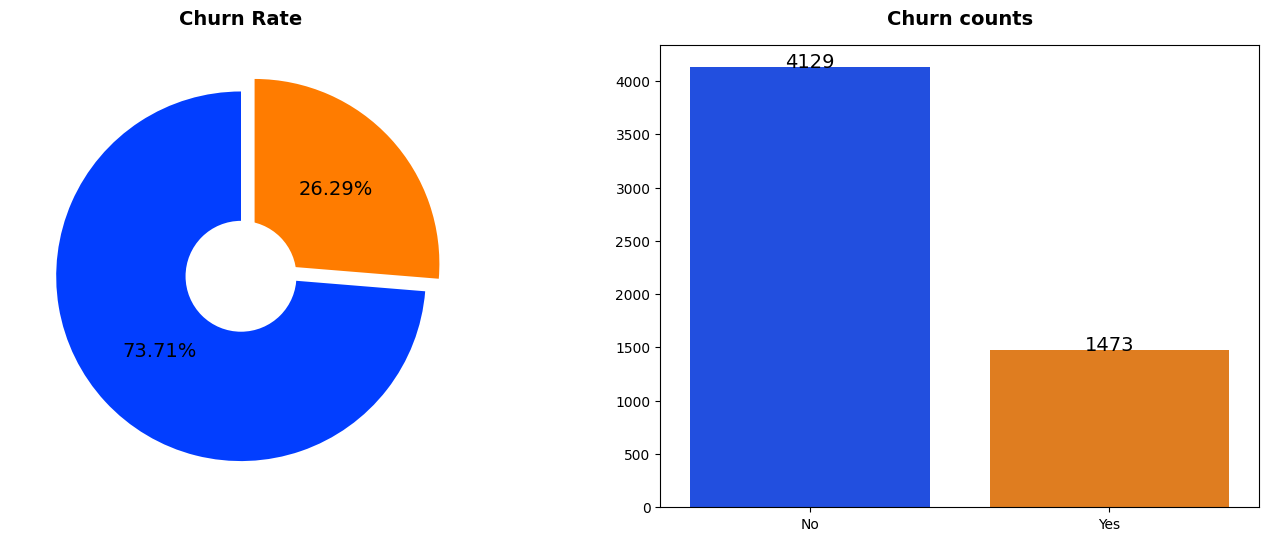

In [23]:
churn_count = train_df["Churn"].value_counts()

plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
colors = sns.color_palette("bright", len(churn_count.index.values))
plt.pie(churn_count, autopct="%.2f%%", textprops={"size": 14,}, colors=colors, explode=[0, 0.1], startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Churn Rate", fontweight="black", size=14, pad=15)

plt.subplot(1,2,2)
sns.barplot(x=churn_count.index.values, y=churn_count.values, palette="bright")
plt.title("Churn counts", fontweight="black", size=14, pad=15)
for i, v in enumerate(churn_count.values):
    plt.text(i,v,v,ha="center", fontsize=14)
    

plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* The Churn rate of the telco company is 73.55%. 
* A symptom of imbalanced-classes problem. 

## Vizualization of Gender-vs-Churn distribution

In [24]:
def pie_bar_plot(df, col, target_col):
    plt.figure(figsize=(14, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('bright', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    
    value_1 = value_counts
    value_2 = df[df[target_col] == 'Yes'][col].value_counts().sort_index()
    
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='bright')
    plt.title(f"Churn Rate by {col}", fontweight="black", size=14, pad=15)
    
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

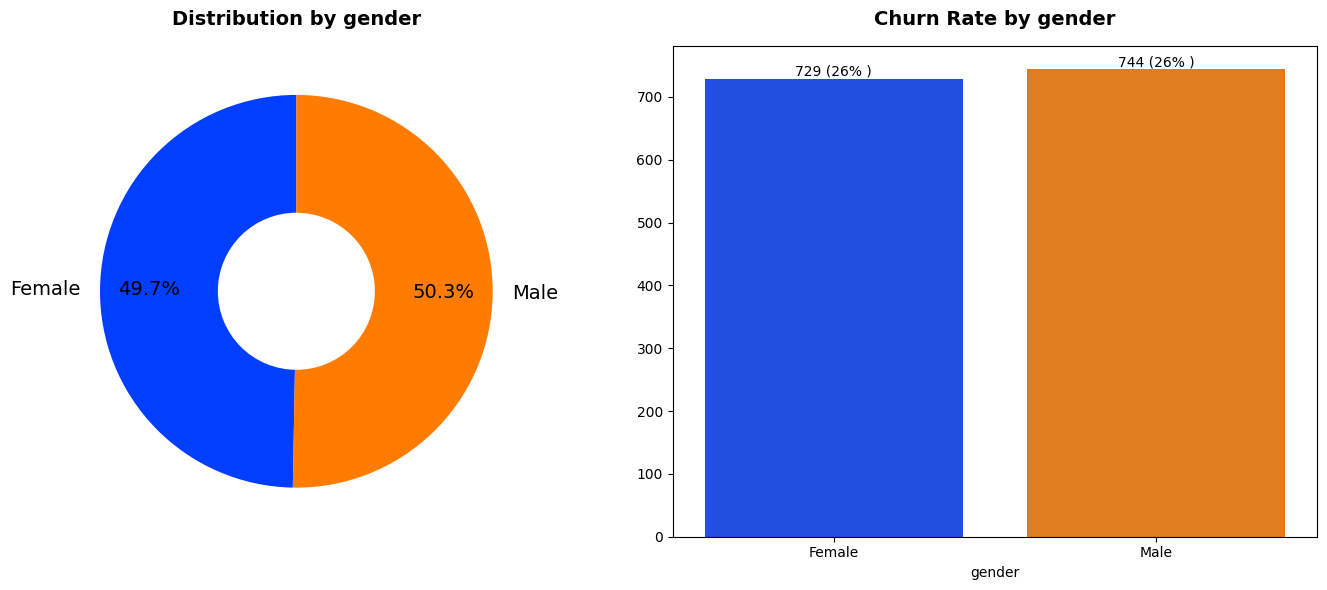

In [25]:
pie_bar_plot(train_df, 'gender', 'Churn')

## Vizualization of Monthly Charges-vs-Churn distribution

In [26]:
def hist_with_hue(df, col, target_col):
    plt.figure(figsize=(13.5, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=target_col, data=df, kde=True, palette='bright')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=target_col, y=col, data=df, palette='bright')
    plt.title(f"Distribution by {col} & {target_col}", fontweight="black", size=14, pad=10)
    
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

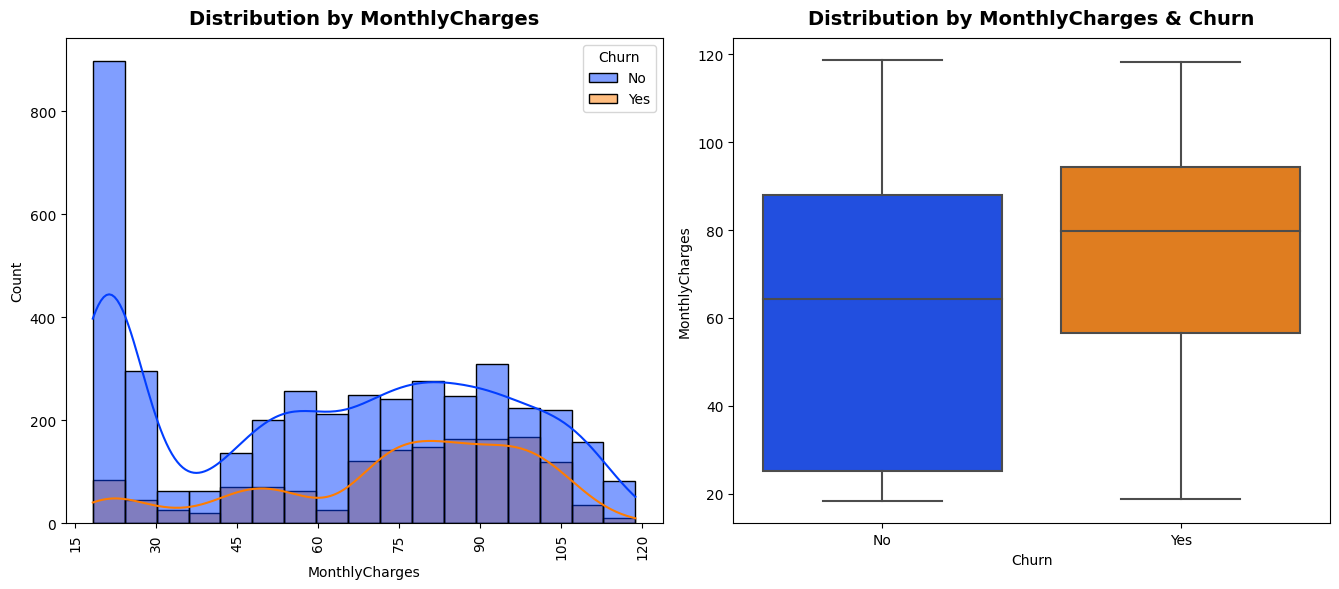

In [27]:
hist_with_hue(train_df, 'MonthlyCharges', 'Churn')

## Vizualization of Tenure-vs-Churn distribution

In [28]:
def count_percent_plot(df, col, target_col):
    value_1 = df[col].value_counts().sort_index()
    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[target_col] == 'Yes'][col].value_counts().reindex(value_1.index)
    churn_rate = (value_2.fillna(0).values / value_1.values * 100)
    
    fig, axes = plt.subplots(ncols=2, figsize=(13.5, 8), sharey=True)
    
    t1 = sns.barplot(y=[i for i in range(len(value_1.index.astype("category")))], x=value_1.values, ax=axes[0], palette='bright', orient='h')
    t1.set_yticklabels(value_1.index.astype("category"), ha="center", position=(1.01,0)) # ha and position adjustments.           
    t1.invert_xaxis()
    t1.yaxis.tick_right()
    axes[0].margins(x=0.15)
    axes[0].set_title(f"Customers by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        axes[0].text(value, index, f"{value} ({count_percentage})", ha="right", va="center", size=10)
    axes[0].set_xlabel('Count')
    
    
    t2 = sns.barplot(y=[i for i in range(len(value_1.index.astype("category")))], x=churn_rate, ax=axes[1], palette='bright', orient='h')
    t2.set_yticklabels(value_1.index.astype("category"), ha="center", position=(1.,0)) # ha and position adjustments.
    axes[1].margins(x=0.1)
    axes[1].set_title(f"Churn by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(churn_rate):
        churn_percentage = "{:.1f}%".format(np.round(churn_rate[index], 1))
        axes[1].text(value, index, churn_percentage, ha="left", va="center", size=10)
    axes[1].set_xlabel(f"{target_col} Rate")
    axes[1].set_ylabel(col)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


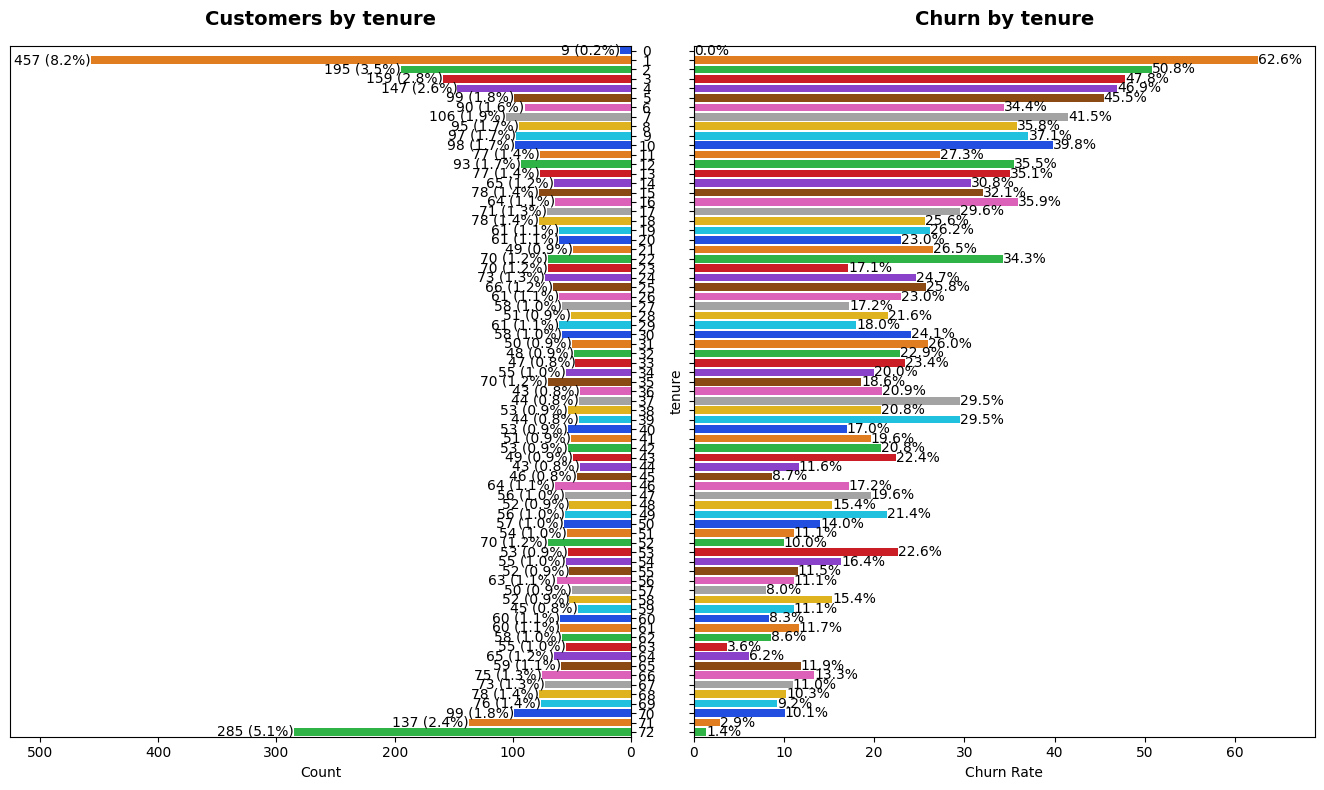

In [29]:
count_percent_plot(train_df, 'tenure', 'Churn')

## Visualization of Tenure-vs-Contract distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

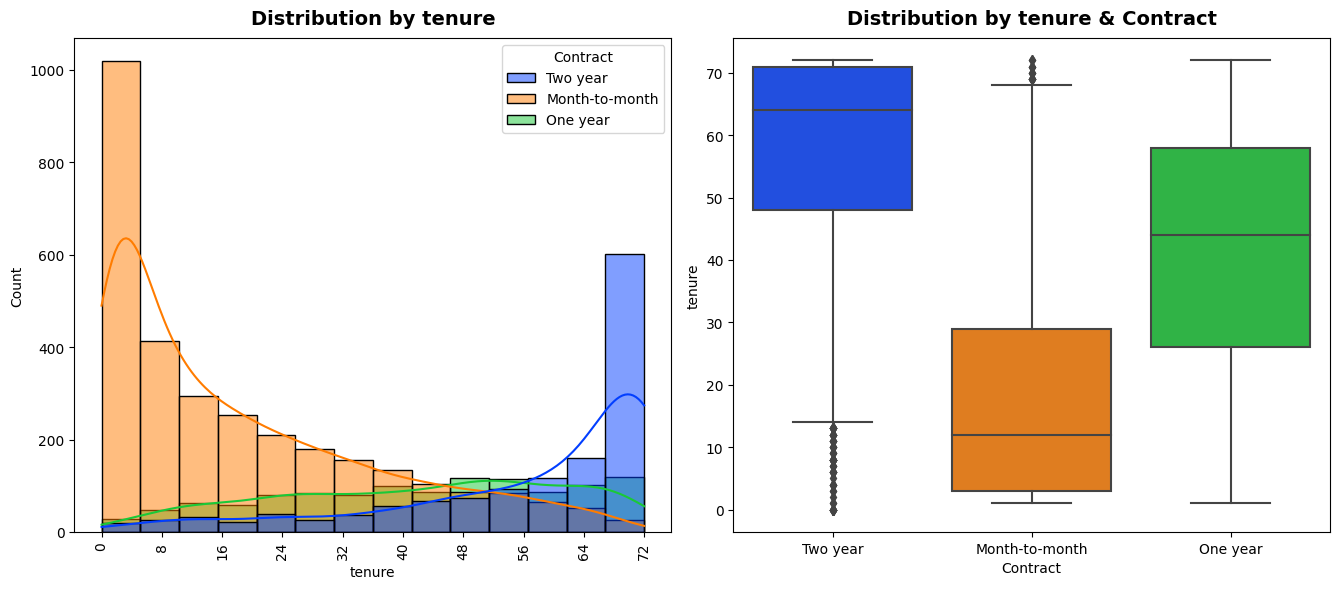

In [30]:
hist_with_hue(train_df, 'tenure', 'Contract')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* This visualization explains the special shape of tenure distribution in the Tenure-vs-Churn distribution. 
* There is an interaction of contract types on the tenure period. 

## Visualization of Contract-vs-Churn distribution

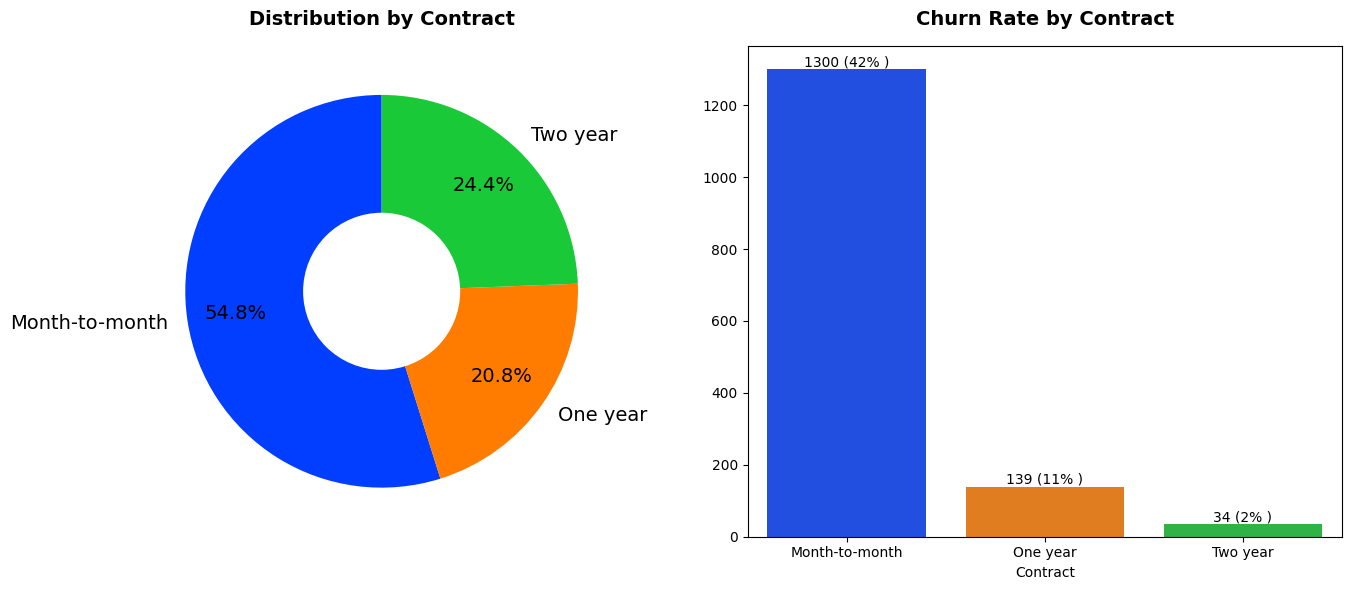

In [31]:
pie_bar_plot(train_df, 'Contract', 'Churn')

# <div style="text-align: left; background-color:seagreen ; font-family: Papyrus, sans-serif; font-size: 25px; font-weight: bold; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Numericalization </div> 

In [32]:
train_df["gender"] = train_df["gender"].replace({"Female":0 ,"Male":1})
test_df["gender"] = test_df["gender"].replace({"Female":0 ,"Male":1})

/tmp/ipykernel_18/27104521.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["gender"] = train_df["gender"].replace({"Female":0 ,"Male":1})
/tmp/ipykernel_18/27104521.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["gender"] = test_df["gender"].replace({"Female":0 ,"Male":1})


In [33]:
train_df["Partner"] = train_df["Partner"].replace({"No":0 ,"Yes":1})
test_df["Partner"] = test_df["Partner"].replace({"No":0 ,"Yes":1})

/tmp/ipykernel_18/71233744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["Partner"] = train_df["Partner"].replace({"No":0 ,"Yes":1})
/tmp/ipykernel_18/71233744.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["Partner"] = test_df["Partner"].replace({"No":0 ,"Yes":1})


In [34]:
train_df["Dependents"] = train_df["Dependents"].replace({"No":0 ,"Yes":1})
test_df["Dependents"] = test_df["Dependents"].replace({"No":0 ,"Yes":1})

/tmp/ipykernel_18/1398377074.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["Dependents"] = train_df["Dependents"].replace({"No":0 ,"Yes":1})
/tmp/ipykernel_18/1398377074.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["Dependents"] = test_df["Dependents"].replace({"No":0 ,"Yes":1})


In [35]:
train_df["PhoneService"] = train_df["PhoneService"].replace({"No":0 ,"Yes":1})
test_df["PhoneService"] = test_df["PhoneService"].replace({"No":0 ,"Yes":1})

/tmp/ipykernel_18/3213861495.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["PhoneService"] = train_df["PhoneService"].replace({"No":0 ,"Yes":1})
/tmp/ipykernel_18/3213861495.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["PhoneService"] = test_df["PhoneService"].replace({"No":0 ,"Yes":1})


In [36]:
train_df["PaperlessBilling"] = train_df["PaperlessBilling"].replace({"No":0 ,"Yes":1})
test_df["PaperlessBilling"] = test_df["PaperlessBilling"].replace({"No":0 ,"Yes":1})

/tmp/ipykernel_18/3946030378.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["PaperlessBilling"] = train_df["PaperlessBilling"].replace({"No":0 ,"Yes":1})
/tmp/ipykernel_18/3946030378.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["PaperlessBilling"] = test_df["PaperlessBilling"].replace({"No":0 ,"Yes":1})


In [37]:
train_df["Churn"] = train_df["Churn"].replace({"No":0 ,"Yes":1})
test_df["Churn"] = test_df["Churn"].replace({"No":0 ,"Yes":1})

/tmp/ipykernel_18/2430100553.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["Churn"] = train_df["Churn"].replace({"No":0 ,"Yes":1})
/tmp/ipykernel_18/2430100553.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["Churn"] = test_df["Churn"].replace({"No":0 ,"Yes":1})


In [38]:
# Using pandas get_dummies for one-hot encoding
columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
prefix = ['mlines', 'iservice', 'osecurity', 'obackup', 'dprotection', 'tsupport', 'stv', 'smovies', 'contract', 'pmethod']

train_df_encoded = pd.get_dummies(train_df, columns=columns, prefix=prefix)
test_df_encoded = pd.get_dummies(test_df, columns=columns, prefix=prefix)

In [39]:
train_df_encoded.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1455       0              0        1           0      36             1   
1063       1              0        0           0      10             1   
5590       1              0        1           1      25             1   
624        0              0        0           0       7             1   
3005       0              1        0           0      24             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  smovies_No  \
1455                 1          106.05       3834.40      0  ...       False   
1063                 0           62.25        612.95      0  ...        True   
5590                 1           19.15        477.60      0  ...       False   
624                  0           20.00        137.60      1  ...       False   
3005                 1           20.30        459.95      0  ...       False   

      smovies_No internet service  smovies_Yes  contract_Month-to-month  \
1455                        False         True                    False   
1063                        False        False                     True   
5590                         True        False                     True   
624                          True        False                     True   
3005                         True        False                     True   

      contract_One year  contract_Two year  pmethod_Bank transfer (automatic)  \
1455              False               True                              False   
1063              False              False                               True   
5590              False              False                              False   
624               False              False                               True   
3005              False              False                              False   

      pmethod_Credit card (automatic)  pmethod_Electronic check  \
1455                             True                     False   
1063                            False                     False   
5590                            False                     False   
624                             False                     False   
3005                            False                     False   

      pmethod_Mailed check  
1455                 False  
1063                 False  
5590                  True  
624                  False  
3005                  True  

[5 rows x 41 columns]

In [40]:
# Convert boolean columns to integer (1 and 0)
columns = train_df_encoded.columns.tolist()
columns.remove("Churn")
for col in columns:
    train_df_encoded[col] = train_df_encoded[col]*1
    test_df_encoded[col] = test_df_encoded[col]*1

In [41]:
train_df_encoded.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1455       0              0        1           0      36             1   
1063       1              0        0           0      10             1   
5590       1              0        1           1      25             1   
624        0              0        0           0       7             1   
3005       0              1        0           0      24             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  smovies_No  \
1455                 1          106.05       3834.40      0  ...           0   
1063                 0           62.25        612.95      0  ...           1   
5590                 1           19.15        477.60      0  ...           0   
624                  0           20.00        137.60      1  ...           0   
3005                 1           20.30        459.95      0  ...           0   

      smovies_No internet service  smovies_Yes  contract_Month-to-month  \
1455                            0            1                        0   
1063                            0            0                        1   
5590                            1            0                        1   
624                             1            0                        1   
3005                            1            0                        1   

      contract_One year  contract_Two year  pmethod_Bank transfer (automatic)  \
1455                  0                  1                                  0   
1063                  0                  0                                  1   
5590                  0                  0                                  0   
624                   0                  0                                  1   
3005                  0                  0                                  0   

      pmethod_Credit card (automatic)  pmethod_Electronic check  \
1455                                1                         0   
1063                                0                         0   
5590                                0                         0   
624                                 0                         0   
3005                                0                         0   

      pmethod_Mailed check  
1455                     0  
1063                     0  
5590                     1  
624                      0  
3005                     1  

[5 rows x 41 columns]

# <div style="text-align: left; background-color:seagreen ; font-family: Papyrus, sans-serif; font-size: 25px; font-weight: bold; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Correlation Matrix </div> 

<Axes: title={'center': 'Correlation Plot'}>

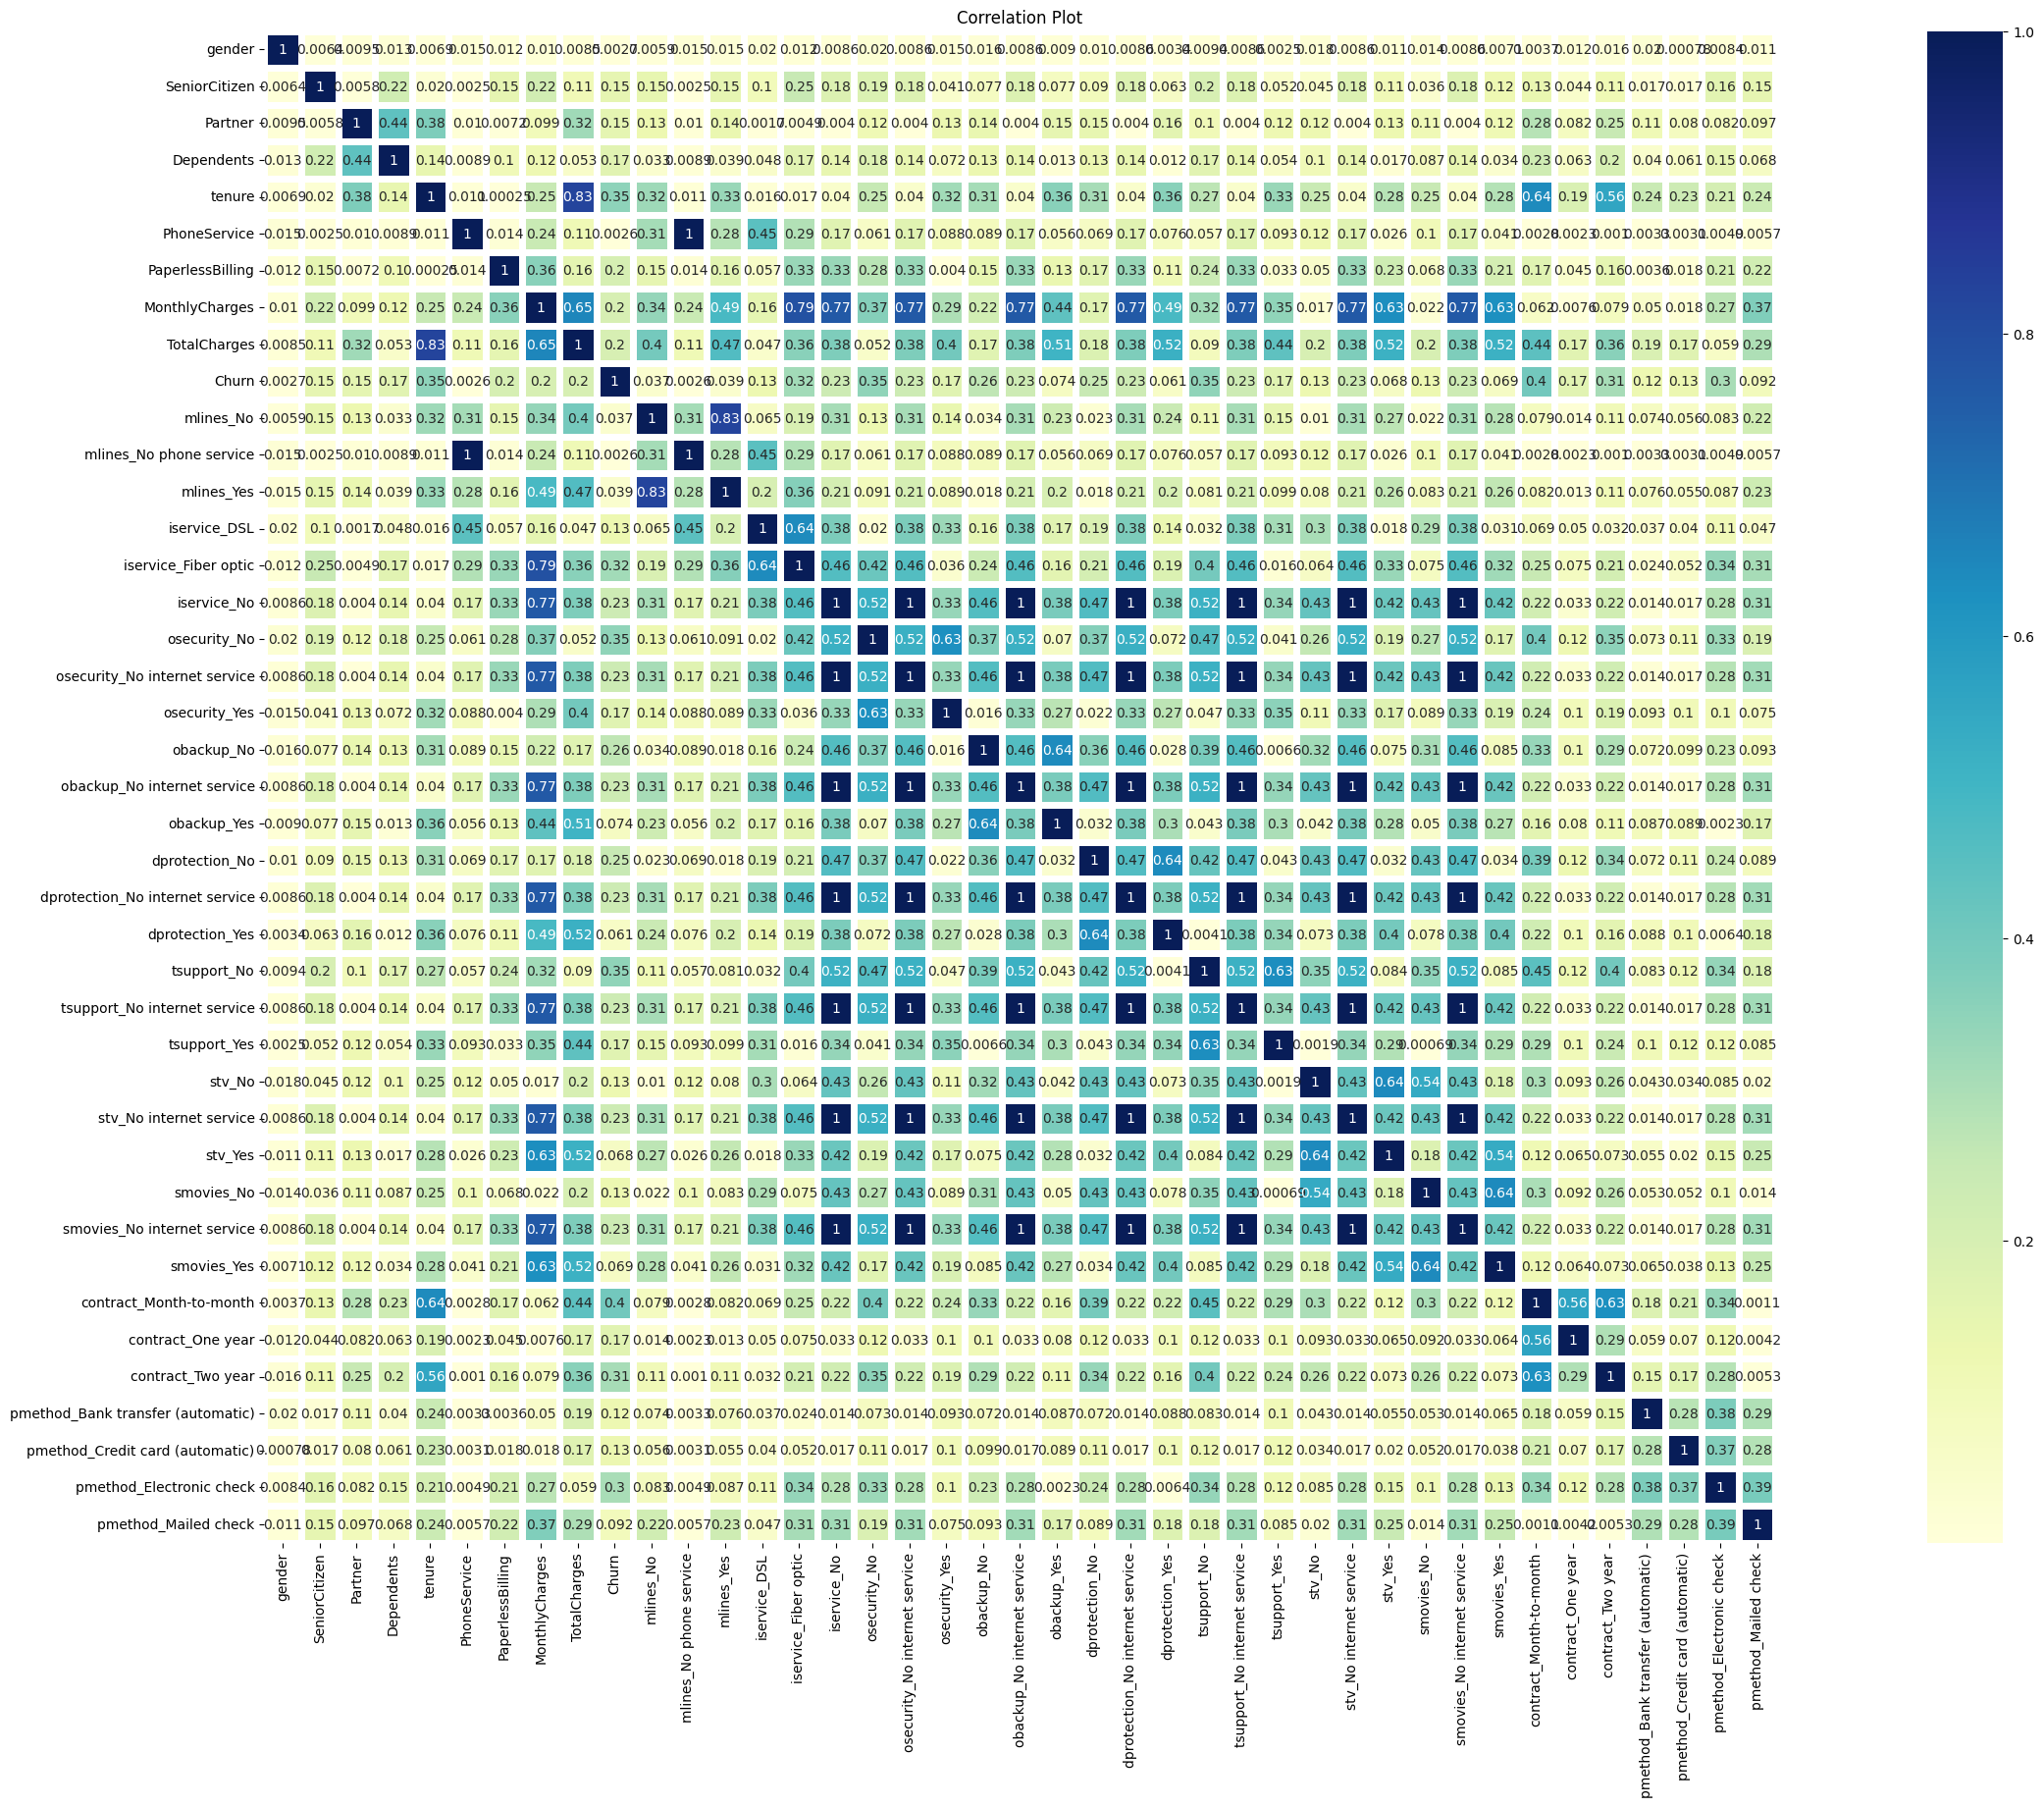

In [42]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(np.abs(train_df_encoded.corr()),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* To avoid unstable estimates of coeffiecients in the model, need to drop the ‘TotalCharges’ variable during regression process, as it is highly correlated to both ‘Tenure’ (0.82) and ‘MonthlyCharges’ (0.65). 
* Also, the ‘MonthlyCharges’ variable needs to be dropped as is highly correlated to many variables such as 'iservice_Fiber optic' (0.79), 'smovies_Yes' (0.63), 'stv_Yes' (0.63). 
* Variables 'iservice_No', 'smovies_No internet service', 'stv_No internet service', 'tsupport_No internet service', 'dprotection_No internet service', 'obackup_No internet service' and 'osecurity_No internet service' are identical (1. correlation) so only one variable ('iservice_No') should be keep. 

<Axes: >

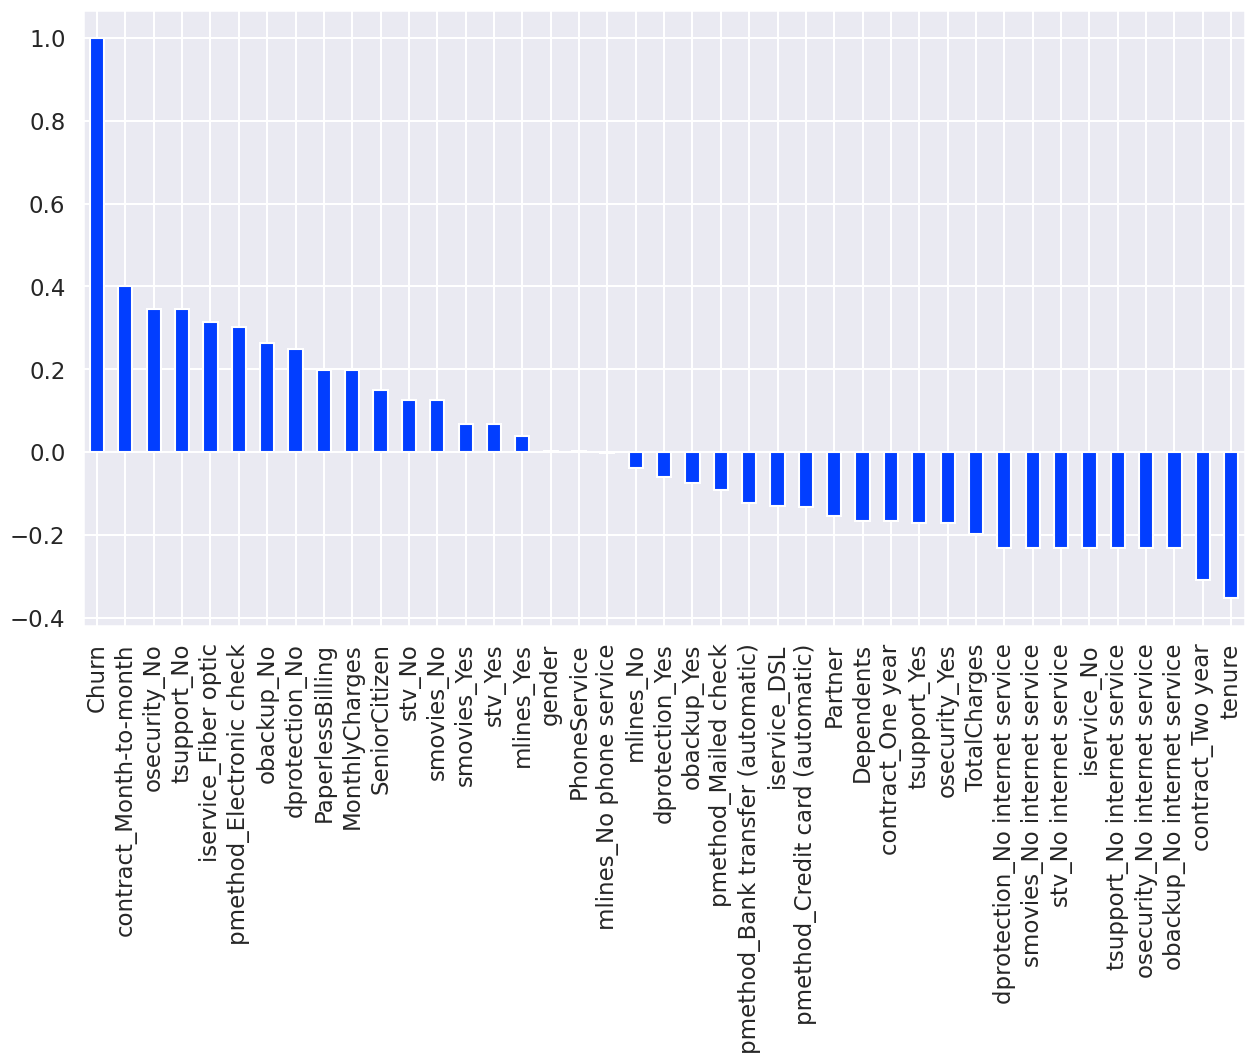

In [43]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='bright')
plt.figure(figsize=(15,8))
train_df_encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Drop highly correlation columns

In [44]:
train_df_encoded = train_df_encoded.drop(['MonthlyCharges', 'TotalCharges', 'smovies_No internet service', 'stv_No internet service', 'tsupport_No internet service', 'dprotection_No internet service', 'obackup_No internet service', 'osecurity_No internet service', 'mlines_No phone service', 'mlines_Yes', 'iservice_DSL', 'osecurity_Yes', 'obackup_Yes', 'dprotection_Yes', 'tsupport_Yes', 'stv_Yes', 'smovies_Yes', 'contract_One year', 'pmethod_Mailed check'], axis=1) # removing Total Charges to avoid multicolinearity.
test_df_encoded = test_df_encoded.drop(['MonthlyCharges', 'TotalCharges', 'smovies_No internet service', 'stv_No internet service', 'tsupport_No internet service', 'dprotection_No internet service', 'obackup_No internet service', 'osecurity_No internet service', 'mlines_No phone service', 'mlines_Yes', 'iservice_DSL', 'osecurity_Yes', 'obackup_Yes', 'dprotection_Yes', 'tsupport_Yes', 'stv_Yes', 'smovies_Yes', 'contract_One year', 'pmethod_Mailed check'], axis=1) # removing Total Charges to avoid multicolinearity.
# train_df_encoded = train_df_encoded[train_df_encoded['tenure']>=36]
# test_df_encoded = test_df_encoded[test_df_encoded['tenure']>=36]

# <div style="text-align: left; background-color:seagreen ; font-family: Papyrus, sans-serif; font-size: 25px; font-weight: bold; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Feature Engineering </div> 

In [45]:
y_train = train_df_encoded['Churn']
X_train = train_df_encoded.drop(columns = ['Churn'])
y_test = test_df_encoded['Churn']
X_test = test_df_encoded.drop(columns = ['Churn'])

# <div style="text-align: left; background-color:seagreen ; font-family: Papyrus, sans-serif; font-size: 25px; font-weight: bold; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Survival Analysis </div> 

In survival analysis, there are two common statistical techniques: Logistic Regression and Cox Proportional Hazards Regression. The fundamental difference between these two techniques is that while Logistic Regression models the probability of the occurrence of the endpoint event, Cox Proportional Hazards Regression models the hazard functions through the assumption of proportional hazards. As mentioned in the title, this section will provide an example of using Cox Proportional Hazards Regression in survival analysis. 

## Kaplan-Meier Estimator and Cox Proportional Hazards Regression

One advantage worth mentioning of Cox Proportional Hazards Regression (CPHR) is its flexibility in controlling the baseline hazard function over time 𝑡 through a non-parametric statistical model similar to the Kaplan–Meier estimator (KME). However, CPHR differs from KME in that CPHR focuses statistical inference on the hazard ratio, specifically on the influence of covariates on the hazard ratio, rather than on estimating the baseline hazard function. This also classifies it as a semi-parametric statistical model. 

**Mathematical Definitions**

Let 𝑇 be a continuous random variable representing the time from registration to churn for a randomly selected customer. 

𝑇 has a probability density function (pdf) 𝑓(𝑡), and cumulative distribution function (cdf) 𝐹(𝑡). 

Survival function: 𝑆(𝑡)=1−𝐹(𝑡)=𝑃(𝑇≥𝑡). 
*𝑆(𝑡) is the probability that the event has not occurred by the time t.*

Hazard function: ℎ(𝑡) = 𝑓(𝑡)/𝑆(𝑡). 
*ℎ(𝑡) measures instantaneous risk, in that ℎ(𝑡)𝑑𝑡 is the probability of churning in the next small interval 𝑑𝑡 given survival to time 𝑡.*


### Kaplan-Meier Estimator

For each customer, two important data points for survival analysis are required

‘tenure’: how long they have been a customer when the data is observed 

‘Churn’: whether or not the customer left when the data was observed

In [46]:
# fitting kmf to churn data
t = X_train['tenure']
churn = y_train
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, churn, label='Estimate for Average Customer')

<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 5602 total observations, 4129 right-censored observations>

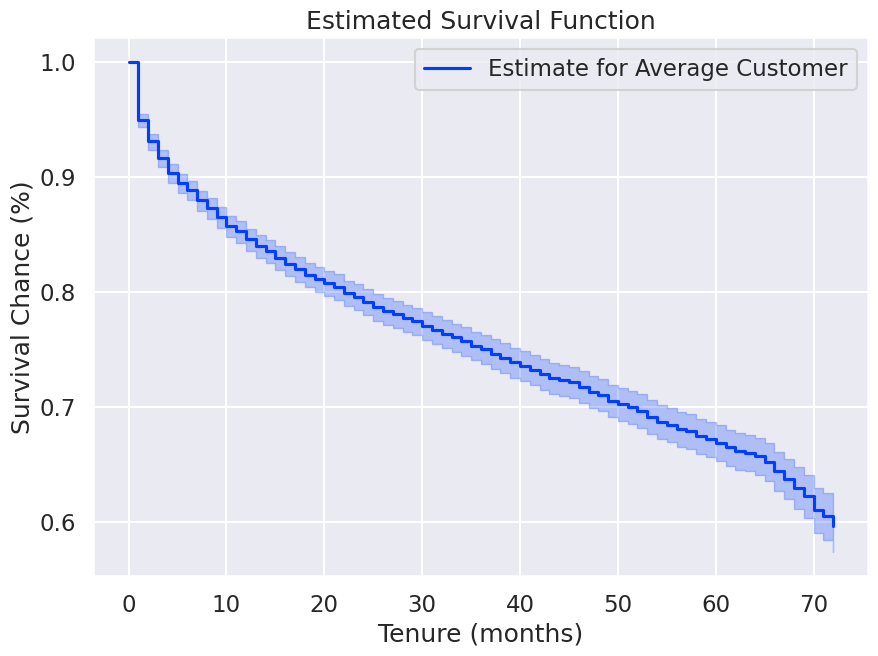

In [47]:
# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Estimated Survival Function')
ax.set_xlabel('Tenure (months)')
ax.set_ylabel('Survival Chance (%)')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* The maximum supported tenure time from the data is 72 months (3 years) with the corresponding retention rate is 0.6
* The company retained over 85% of their customers within the first year of tenure. 

### Cox Proportional Hazards Regression

Cox Proportional Hazards Regression allows the addition of covariates to the previous model by modeling the ratio of hazards. 

#### Check colinearity

<Axes: title={'center': 'Correlation Plot'}>

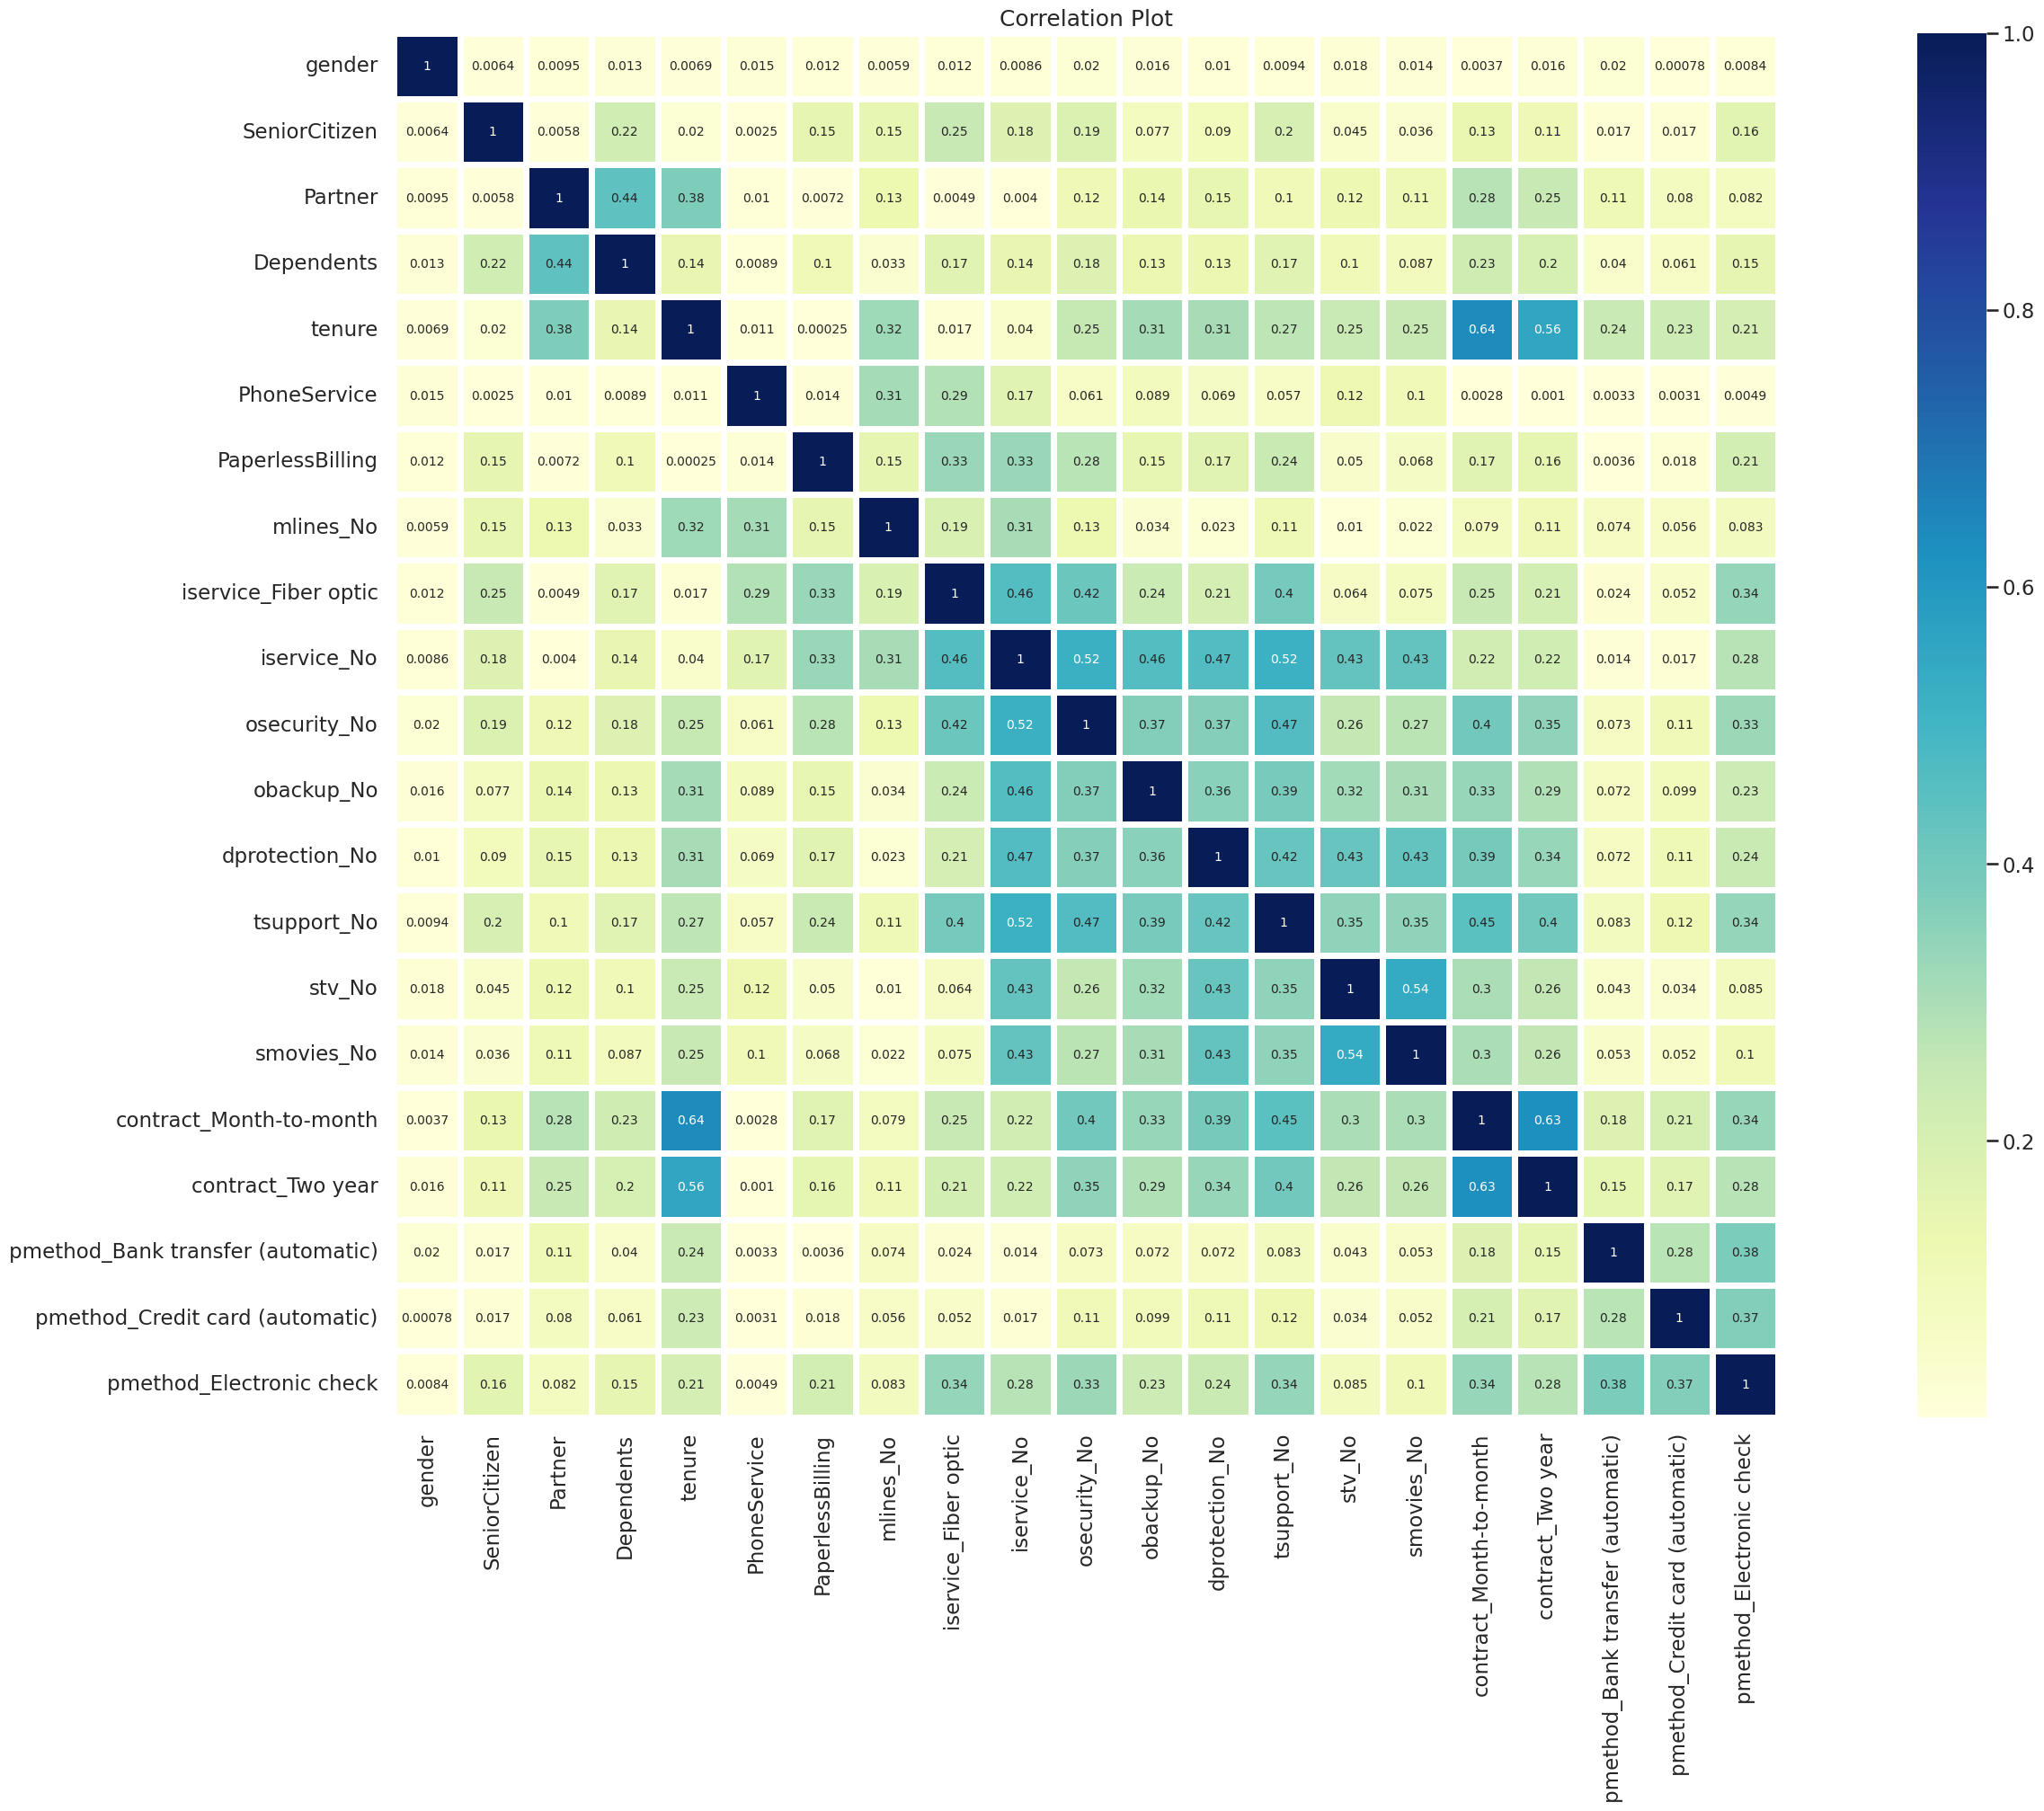

In [48]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(np.abs(X_train.corr()),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [49]:
columns = X_train.columns.tolist()
cph_train = X_train[columns]
cph_train = cph_train[X_train['tenure']>0]
cph_train['Churn'] = y_train.values[(X_train['tenure']>0)]

# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(cph_train, duration_col='tenure', event_col='Churn', robust=True, strata=['mlines_No', 'iservice_No', 'osecurity_No', 'obackup_No', 'tsupport_No', 'stv_No', 'contract_Month-to-month'])   ## Fit the data to train the model
cph.print_summary(model="telecom churn prediction variables", decimals=3)    ## Have a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 5593 total observations, 4120 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
          robust variance = True
                   strata = ['mlines_No', 'iservice_No', 'osecurity_No', 'obackup_No', 'tsupport_No', 'stv_No', 'contract_Month-to-month']
      baseline estimation = breslow
   number of observations = 5593
number of events observed = 1473
   partial log-likelihood = -6262.162
         time fit was run = 2024-05-24 15:26:59 UTC
                    model = telecom churn prediction variables

---
                                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                           
gender                            -0.043     0.958     0.053          -0.146           0.060               0.864               1.062
SeniorCitizen                     -0.054     0.947     0.065          -0.182           0.073               0.834               1.076
Partner                           -0.506     0.603     0.063          -0.629          -0.383               0.533               0.682
Dependents                        -0.058     0.943     0.076          -0.208           0.091               0.812               1.096
PhoneService                      -0.584     0.558     0.125          -0.830          -0.338               0.436               0.713
PaperlessBilling                   0.203     1.225     0.066           0.074           0.332               1.077               1.394
iservice_Fiber optic               0.471     1.601     0.084           0.305           0.636               1.357               1.889
dprotection_No                     0.299     1.348     0.062           0.177           0.420               1.194               1.523
smovies_No                         0.110     1.116     0.060          -0.009           0.228               0.991               1.256
contract_Two year                 -1.955     0.142     0.197          -2.341          -1.569               0.096               0.208
pmethod_Bank transfer (automatic) -0.557     0.573     0.104          -0.760          -0.354               0.468               0.702
pmethod_Credit card (automatic)   -0.587     0.556     0.107          -0.797          -0.377               0.451               0.686
pmethod_Electronic check           0.032     1.032     0.086          -0.137           0.201               0.872               1.222

                                   cmp to      z       p  -log2(p)
covariate                                                         
gender                              0.000 -0.810   0.418     1.260
SeniorCitizen                       0.000 -0.838   0.402     1.316
Partner                             0.000 -8.083 <0.0005    50.496
Dependents                          0.000 -0.764   0.445     1.168
PhoneService                        0.000 -4.657 <0.0005    18.251
PaperlessBilling                    0.000  3.086   0.002     8.946
iservice_Fiber optic                0.000  5.575 <0.0005    25.270
dprotection_No                      0.000  4.821 <0.0005    19.417
smovies_No                          0.000  1.818   0.069     3.856
contract_Two year                   0.000 -9.924 <0.0005    74.698
pmethod_Bank transfer (automatic)   0.000 -5.381 <0.0005    23.689
pmethod_Credit card (automatic)     0.000 -5.483 <0.0005    24.514
pmethod_Electronic check            0.000  0.370   0.711     0.492
---
Concordance = 0.660
Partial AIC = 12550.324
log-likelihood ratio test = 399.132 on 13 df
-log2(p) of ll-ratio test = 254.018

#### Model Validation

**Model assumptions testing**

The proportional hazard assumption is that all customers have the same hazard function, scaled by a factor that is independent of the time variable. So the shape of the hazard function is the same for all customers, and only a scalar changes. 


    ℎ(𝑡;𝑥)=𝜆(𝑡)exp{𝐺(𝑥;𝛽)}
    
    
This is equivalent to the assumption that the hazard ratio,


    ℎ(𝑡;𝑥) / ℎ(𝑡;𝑥') = 𝜆(𝑡)exp{𝐺(𝑥;𝛽)} / 𝜆(𝑡)exp{𝐺(𝑥';𝛽)} = exp{𝐺(𝑥;𝛽)-𝐺(𝑥';𝛽)}
is constant for all 𝑡.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


[[<Axes: xlabel='rank-transformed time\n(p=0.6985)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3868)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.3152)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8833)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9546)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3139)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.1929)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6210)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.8952)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0347)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.6997)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6239)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.4077)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1130)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.8218)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0917)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.6211)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0102)'>],
 [<Axes: xlabel='rank-transformed tim

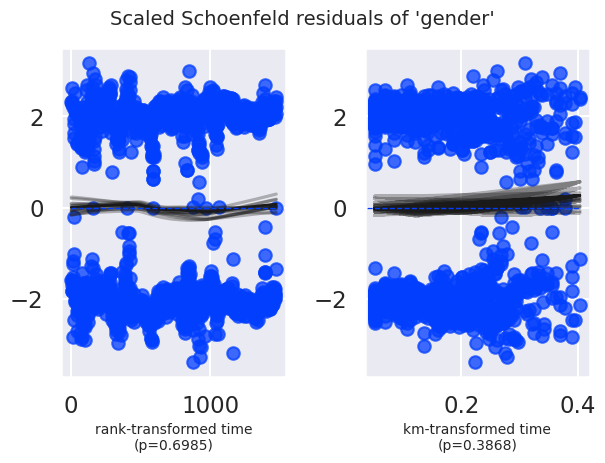

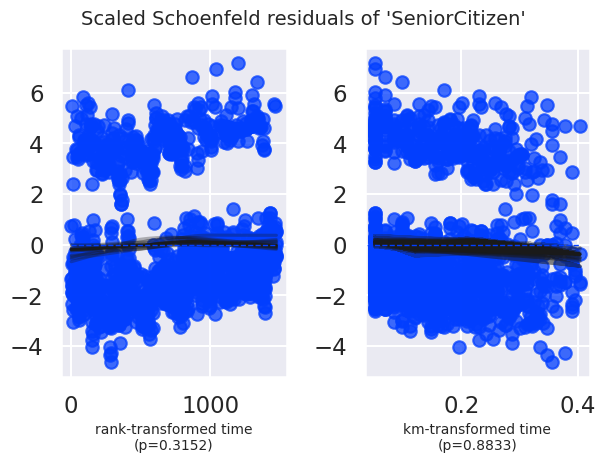

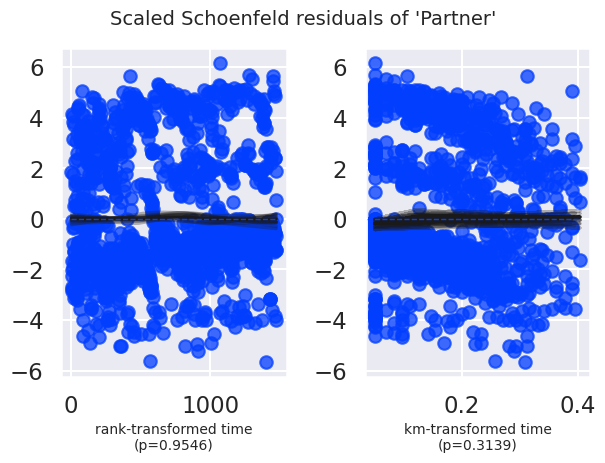

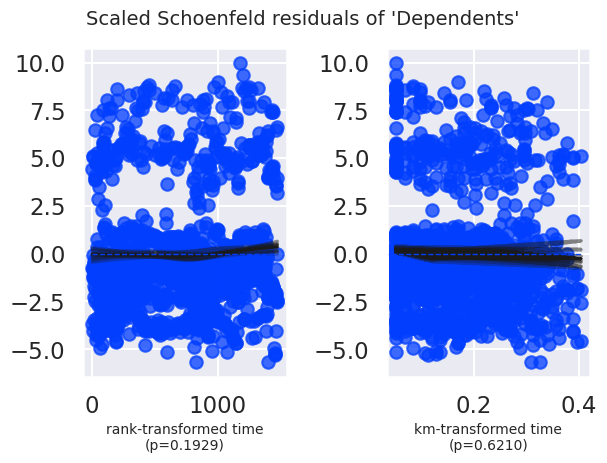

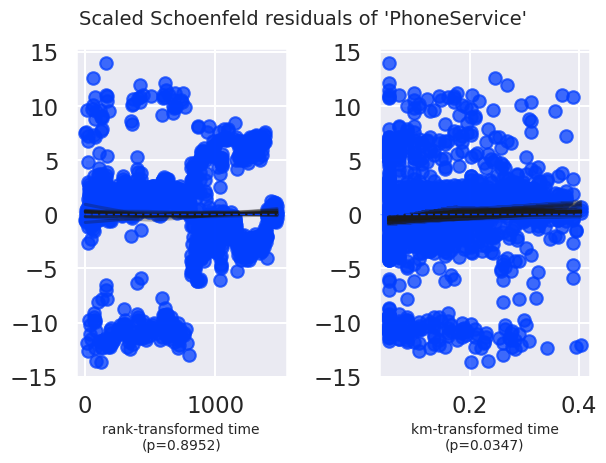

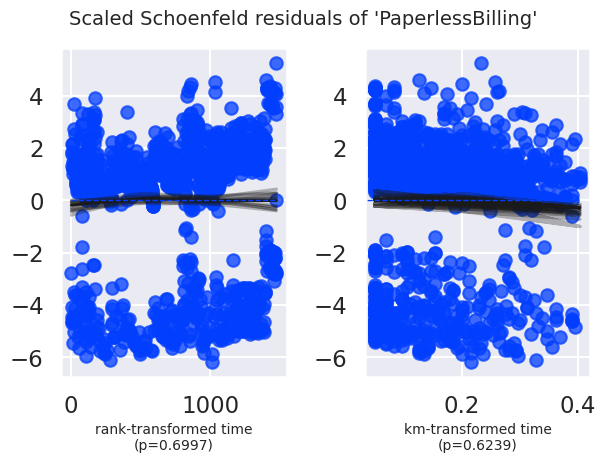

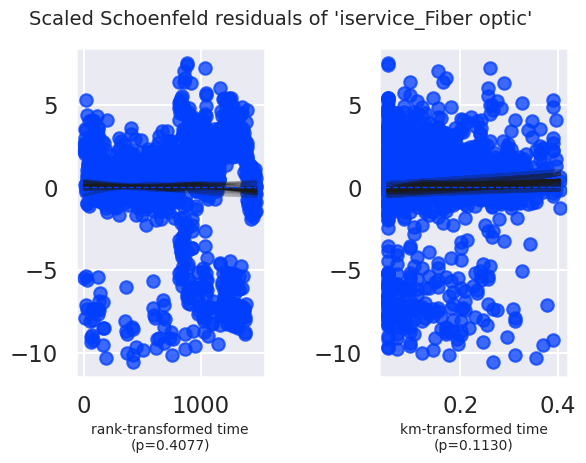

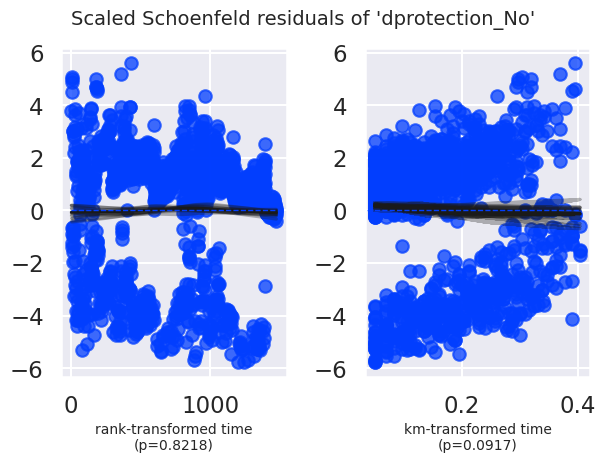

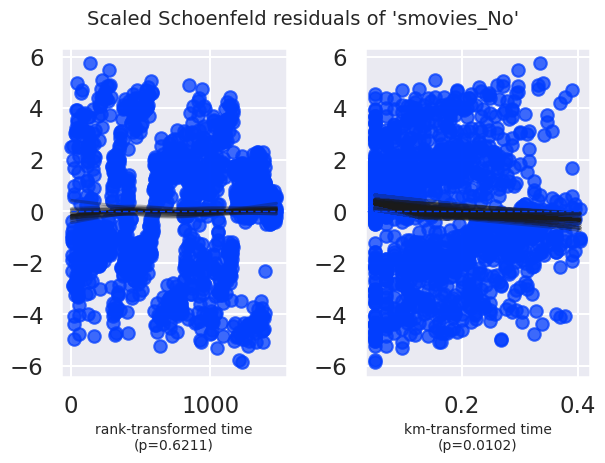

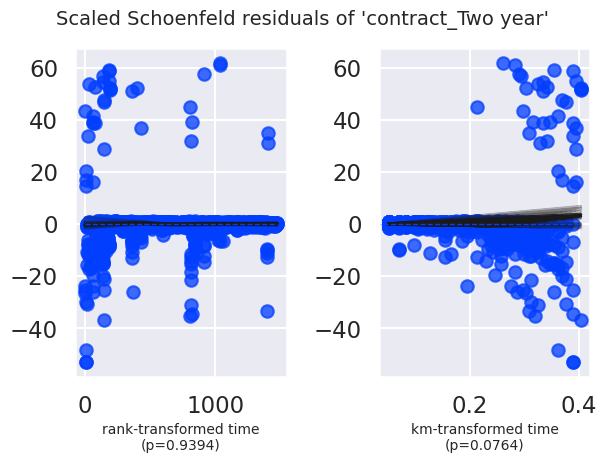

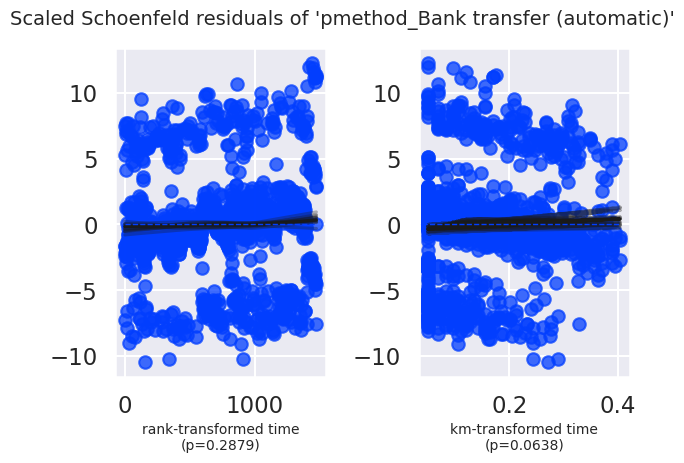

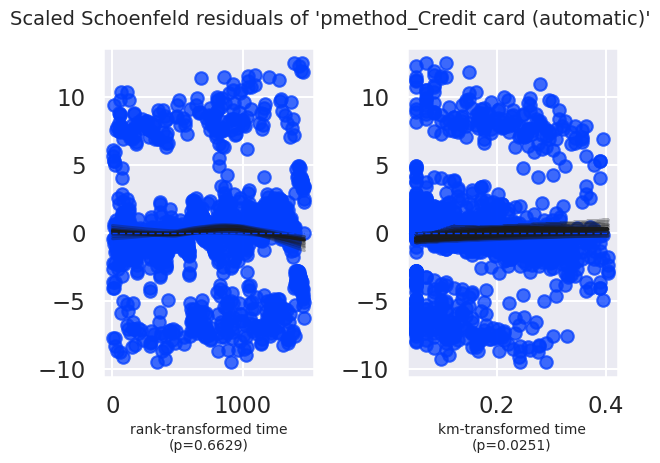

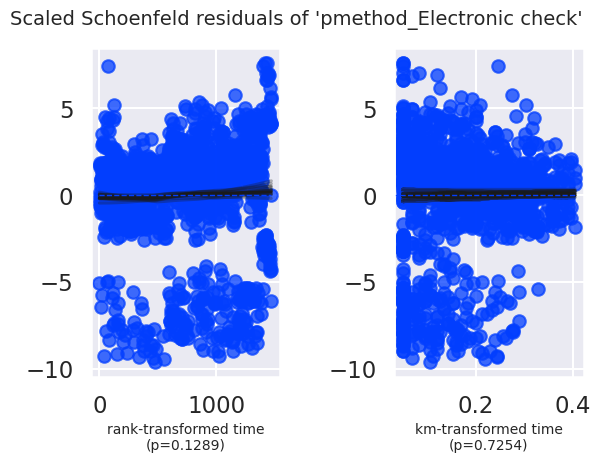

In [50]:
# After adjusted p_value_threshold with Bonferroni Correction 1.-(1.-0.05)**(1./14) ~ 0.0037
cph.check_assumptions(cph_train, p_value_threshold=0.0037, show_plots=True)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* The mean-value lines of the Schoenfeld residuals of all the graphs fluctuate slightly around the horizontal line at value 0. 

#### Statistical Interpretation

Text(0.5, 1.0, 'Coefficients of Confidence Intervals')

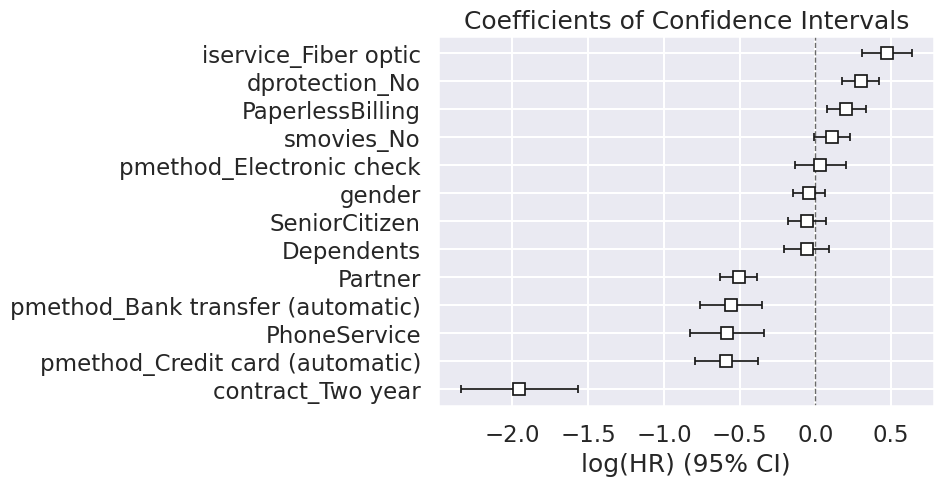

In [51]:
cph.plot()
plt.title('Coefficients of Confidence Intervals')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* Significant positive-effect features (more likely to churn): 'iservice_Fiber optic', 'dprotection_No', 'PaperlessBilling'. 
* Significant negative-effect features (less likely to churn): 'Partner', 'pmethod_Bank transfer (automatic)', 'PhoneService', 'pmethod_Credit card (automatic)', 'contract_Two year'. 
* Although with the current model we do not have a statistical basis to assess the impact of features 'obackup_No' and 'contract_Month-to-month' on predicting churn, the results in the following sections show a significant impact of these features. This indicates that putting in additional effort to create a statistically appropriate model for these variables is very valuable.

# <div style="text-align: left; background-color:seagreen ; font-family: Papyrus, sans-serif; font-size: 25px; font-weight: bold; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Calibration </div> 

#### Model Calibration

ICI =  0.0964605303451818
E50 =  0.0802399749863072


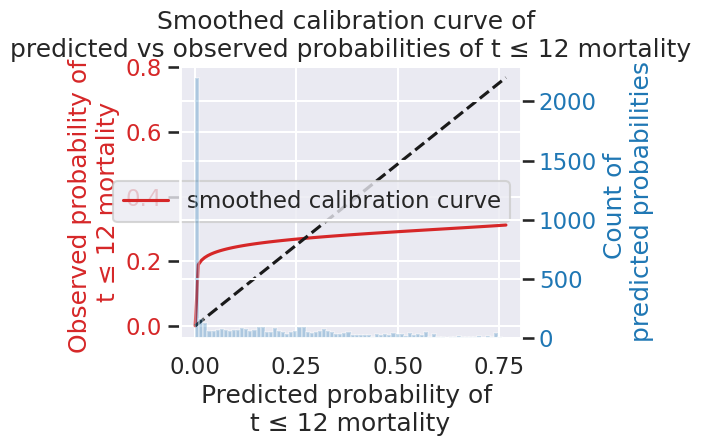

In [52]:
survival_probability_calibration(cph, cph_train, t0=12);

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* The model underpredicts risk at the low end (< 27% chance of churn) and slightly overpredict risk at the high end (> 27% chance of churn). 
* Need more features for short-term churn prediction. 

ICI =  0.00966042861081704
E50 =  0.009123084214309962


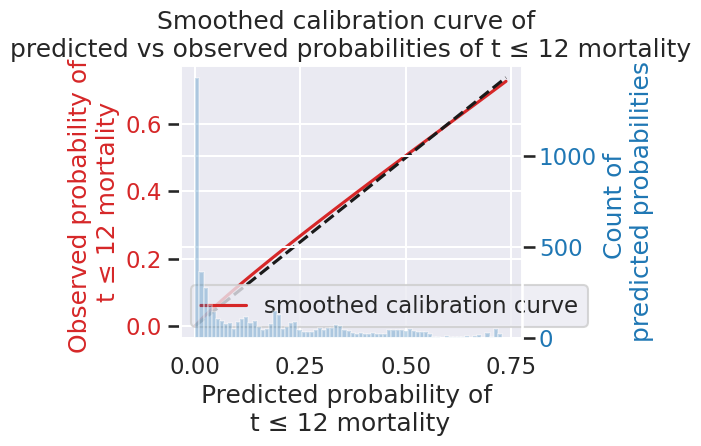

In [53]:
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(cph_train, duration_col='tenure', event_col='Churn', robust=True)   ## Fit the data to train the model
survival_probability_calibration(cph, cph_train, t0=12);

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue> 📝 Outlines: </font></h3>

* The calibration curve is better than before (very close to the ideal straight line) and reflects improvement of the model prediction ability. 